<a href="https://colab.research.google.com/github/fullstackDonya/loto/blob/main/Terre_Soleil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt

def get_distance_data(start_date, end_date):
    url = (
        "https://ssd.jpl.nasa.gov/api/horizons.api?"
        "format=text&COMMAND='399'&CENTER='@10'"
        f"&START_TIME='{start_date}'&STOP_TIME='{end_date}'&STEP_SIZE='1d'"
        "&QUANTITIES='20'"
    )

    response = requests.get(url)
    if response.status_code == 200:
        text = response.text
        # On extrait uniquement la partie des donn√©es entre les balises $$SOE et $$EOE
        data_start = text.find("$$SOE") + len("$$SOE\n")
        data_end = text.find("$$EOE")
        data_cleaned = text[data_start:data_end].strip()

        # Chaque ligne contient : date, distance (AU), etc. On garde la date et la distance
        # Exemple d'une ligne : "2020-Jan-01 00:00   0.983298665911"
        lines = data_cleaned.split("\n")
        rows = []
        for line in lines:
            parts = line.strip().split()
            date_str = f"{parts[0]} {parts[1]}"
            distance_au = float(parts[-1])  # En unit√© astronomique
            distance_km = distance_au * 149_597_870.7  # conversion AU -> km
            rows.append([date_str, distance_km])

        df = pd.DataFrame(rows, columns=["Date", "Distance_km"])
        df["Date"] = pd.to_datetime(df["Date"])
        return df
    else:
        print("Erreur dans la requ√™te API")
        return None


# Obtenir les distances de 1900 √† 2024
df_distance = get_distance_data("1900-01-01", "2024-12-31")

# Affichage des 5 premi√®res lignes pour v√©rifier
print(df_distance.head())

        Date   Distance_km
0 1900-01-01 -1.185264e+06
1 1900-01-02 -2.541369e+05
2 1900-01-03  6.803262e+05
3 1900-01-04  1.644529e+06
4 1900-01-05  2.662603e+06


        Date   Distance_km
0 1900-01-01 -1.185264e+06
1 1900-01-02 -2.541369e+05
2 1900-01-03  6.803262e+05
3 1900-01-04  1.644529e+06
4 1900-01-05  2.662603e+06


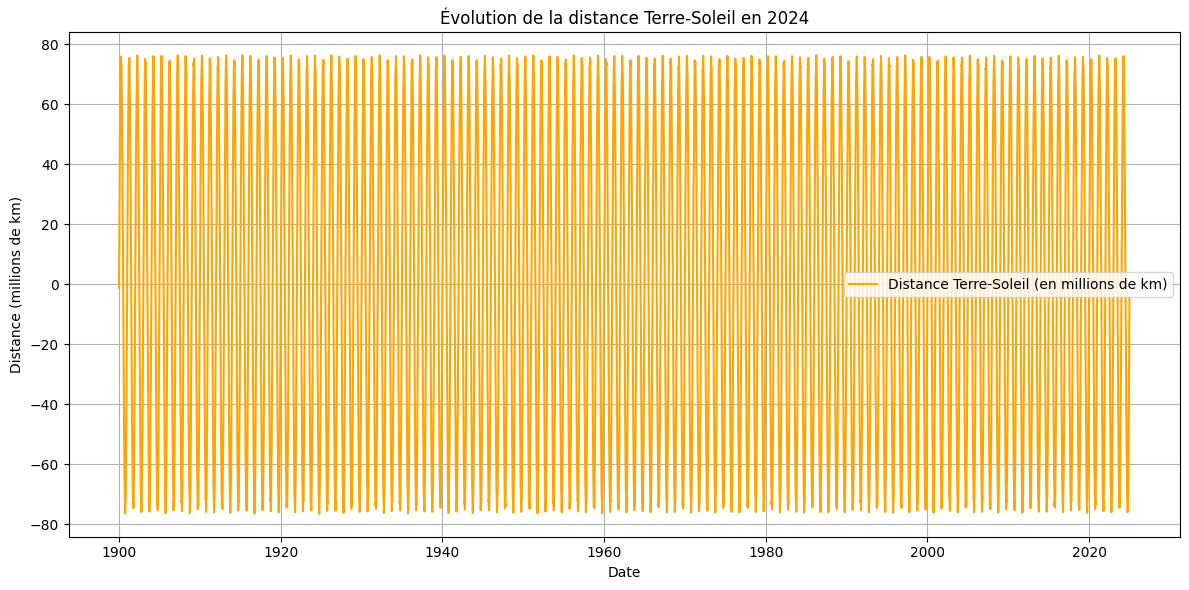

In [33]:

# V√©rification
print(df_distance.head())

# Tracer la courbe
plt.figure(figsize=(12, 6))
plt.plot(df_distance["Date"], df_distance["Distance_km"] / 1e6, label="Distance Terre-Soleil (en millions de km)", color="orange")
plt.xlabel("Date")
plt.ylabel("Distance (millions de km)")
plt.title("√âvolution de la distance Terre-Soleil en 2024")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


üå°Ô∏è Temp√©rature moyenne estim√©e (mod√®le en √©quilibre radiatif)
La temp√©rature moyenne de la Terre
ùëá
T (en Kelvin) peut √™tre estim√©e par :

ùëá
=
(
(
1
‚àí
ùê¥
)
‚ãÖ
ùëÜ
4
‚ãÖ
ùúé
‚ãÖ
ùê∑
2
)
1
/
4
T=(
4‚ãÖœÉ‚ãÖD
2

(1‚àíA)‚ãÖS
‚Äã
 )
1/4

O√π :

ùê¥
A = alb√©do terrestre moyen ‚âà 0.3

ùëÜ
S = constante solaire ‚âà 1361 W/m¬≤ (puissance re√ßue √† 1 UA)

ùúé
œÉ = constante de Stefan-Boltzmann ‚âà 5.67 √ó 10‚Åª‚Å∏ W¬∑m‚Åª¬≤¬∑K‚Åª‚Å¥

ùê∑
D = distance Terre-Soleil en UA

Cette formule suppose que la Terre est une sph√®re noire recevant le rayonnement solaire, sans atmosph√®re (‚âà 255 K). Avec l‚Äôeffet de serre, la temp√©rature r√©elle moyenne est ‚âà 288 K.

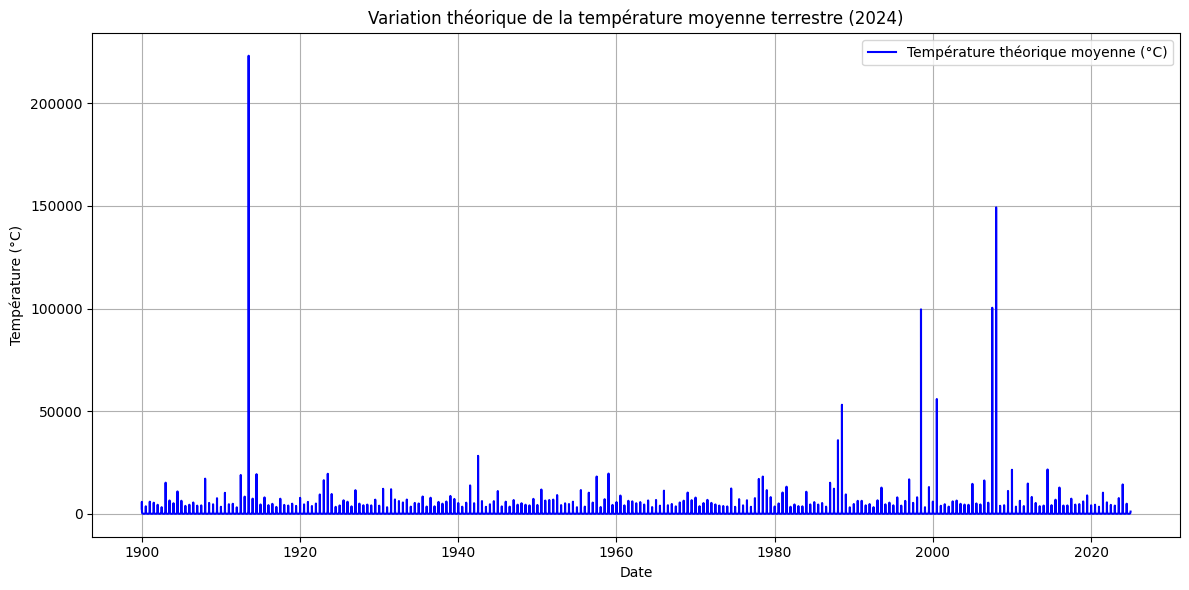

In [34]:
import numpy as np

def compute_temperature(distance_au, albedo=0.3, solar_constant=1361, sigma=5.67e-8):
    # D en unit√©s astronomiques ‚Üí on ram√®ne √† 1 UA
    return ((1 - albedo) * solar_constant / (4 * sigma * (distance_au ** 2))) ** 0.25

# Ajouter la distance en AU pour la formule
df_distance["Distance_AU"] = df_distance["Distance_km"] / 149_597_870.7
df_distance["Temp_K"] = df_distance["Distance_AU"].apply(compute_temperature)
df_distance["Temp_C"] = df_distance["Temp_K"] - 273.15  # conversion en ¬∞C

# Tracer la temp√©rature
plt.figure(figsize=(12, 6))
plt.plot(df_distance["Date"], df_distance["Temp_C"], color="blue", label="Temp√©rature th√©orique moyenne (¬∞C)")
plt.xlabel("Date")
plt.ylabel("Temp√©rature (¬∞C)")
plt.title("Variation th√©orique de la temp√©rature moyenne terrestre (2024)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Les principaux facteurs qui influencent la temp√©rature terrestre comprennent :

L'atmosph√®re : Elle agit comme un isolant et redistribue la chaleur √† l'√©chelle plan√©taire. Les gaz √† effet de serre (comme le dioxyde de carbone, la vapeur d'eau et le m√©thane) emprisonnent une partie de l'√©nergie thermique, r√©chauffant ainsi la surface de la Terre.

L'effet de serre : Une partie de l'√©nergie thermique √©mise par la Terre (apr√®s avoir absorb√© le rayonnement solaire) est renvoy√©e vers la surface par l'atmosph√®re. L'intensit√© de cet effet d√©pend de la concentration des gaz √† effet de serre.

Les saisons : Elles sont caus√©es par l'inclinaison de l'axe terrestre par rapport au plan de l'orbite. Cela entra√Æne des variations saisonni√®res dans la quantit√© de rayonnement solaire re√ßue par diff√©rentes r√©gions du monde.

Les oc√©ans : Les oc√©ans jouent un r√¥le crucial dans la r√©gulation de la temp√©rature mondiale en raison de leur capacit√© √† stocker et √† redistribuer l'√©nergie thermique (effet mod√©rateur). L'√©vaporation, la condensation, et les courants marins ont tous une influence sur la temp√©rature locale et mondiale.

üå°Ô∏è Mod√®le am√©lior√© (approxim√©)
Le mod√®le qui inclut ces facteurs pourrait √™tre bas√© sur une √©quation de temp√©rature globale moyenne ajust√©e en fonction des param√®tres environnementaux. Bien qu'il soit impossible de simuler ces facteurs pr√©cis√©ment sans un mod√®le climatique complet (comme ceux utilis√©s par les agences de pr√©visions m√©t√©orologiques), on peut appliquer des approximations pour en tenir compte.

Voici une version simplifi√©e avec des ajustements pour l'effet de serre, les saisons, et les oc√©ans :

1. Effet de serre (effet r√©aliste)
L'effet de serre peut √™tre ajout√© √† la formule comme un facteur d'augmentation de temp√©rature qui d√©pend de la concentration en gaz √† effet de serre (CO‚ÇÇ, H‚ÇÇO, etc.). Ce facteur peut √™tre estim√© en fonction de la distance Terre-Soleil et des gaz √† effet de serre moyens.

2. Saisons et Inclinaison axiale
Les saisons sont principalement dues √† l'inclinaison de l'axe terrestre (
ùúÉ
‚âà
23.5
‚àò
Œ∏‚âà23.5
‚àò
 ). La variation de l'angle d'incidence du rayonnement solaire sur la Terre change en fonction de la latitude et du temps de l'ann√©e. On peut ajuster cela en calculant l'angle d'incidence du Soleil selon le jour de l'ann√©e et la latitude moyenne.

3. Oc√©ans (mod√©ration de la temp√©rature)
L'eau a une capacit√© thermique √©lev√©e, ce qui signifie que les oc√©ans peuvent absorber et lib√©rer de l'√©nergie plus lentement que les terres. Cela a pour effet de mod√©rer les temp√©ratures, particuli√®rement sur les continents proches des oc√©ans.

üßÆ Formule de la temp√©rature ajust√©e
En tenant compte de ces effets, on peut proposer une formule simplifi√©e pour la temp√©rature
ùëá
globale
T
globale
‚Äã
  :

ùëá
globale
=
ùëá
radiative
√ó
(
1
+
effet¬†de¬†serre
)
√ó
facteur¬†saisonnier
√ó
facteur¬†oc
e
Àä
an
T
globale
‚Äã
 =T
radiative
‚Äã
 √ó(1+effet¬†de¬†serre)√ófacteur¬†saisonnier√ófacteur¬†oc
e
Àä
 an
O√π :

ùëá
radiative
T
radiative
‚Äã
  est la temp√©rature calcul√©e √† partir du mod√®le d'√©quilibre radiatif (comme mentionn√© pr√©c√©demment).

Effet de serre : Peut √™tre estim√© par un facteur multiplicatif en fonction de la concentration de CO‚ÇÇ. Par exemple, un facteur de
1.2
1.2 pourrait √™tre appliqu√© pour un effet de serre mod√©r√©.

Facteur saisonnier : Calcul√© en fonction de l'angle d'incidence du Soleil. Plus l'inclinaison axiale est grande pendant l'ann√©e, plus la variation de la temp√©rature sera significative.

Facteur oc√©an : On pourrait estimer un facteur d'att√©nuation de
0.8
0.8 pour mod√©rer les effets thermiques en raison des oc√©ans.



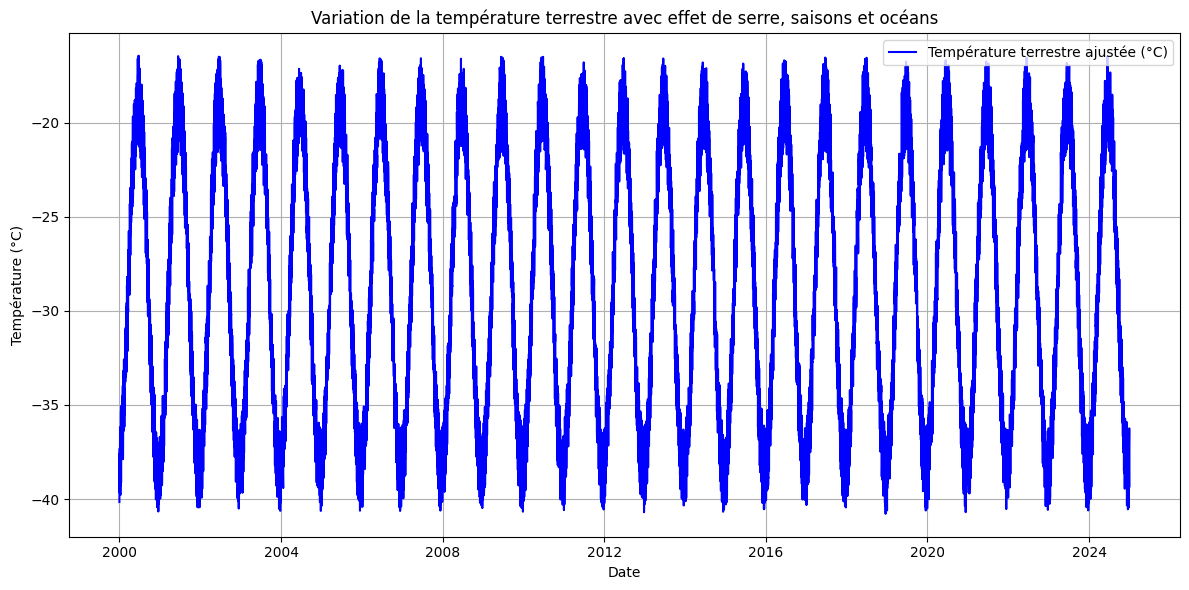

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Param√®tres constants
albedo = 0.3  # Alb√©do moyen de la Terre
solar_constant = 1361  # Constante solaire en W/m¬≤
sigma = 5.67e-8  # Constante de Stefan-Boltzmann en W/m¬≤/K‚Å¥
eccentricity = 0.0167  # Excentricit√© orbitale de la Terre (valeur moyenne)

# Fonction pour calculer la temp√©rature radiative
def compute_radiative_temperature(distance_au):
    return ((1 - albedo) * solar_constant / (4 * sigma * (distance_au ** 2))) ** 0.25

# Fonction pour appliquer l'effet de serre
def apply_greenhouse_effect(temp_radiative, co2_factor=1.2):
    return temp_radiative * co2_factor

# Fonction pour calculer le facteur saisonnier (variation de l'inclinaison de l'axe terrestre)
def seasonal_factor(day_of_year):
    # Calcul de l'angle d'incidence du Soleil en fonction du jour de l'ann√©e (simplifi√©)
    angle_of_inclination = 23.5 * np.sin(np.deg2rad((360 / 365.25) * (day_of_year - 81)))  # Variation annuelle
    return 1 + 0.1 * np.sin(np.deg2rad(angle_of_inclination))  # Facteur saisonnier simplifi√©

# Fonction pour appliquer l'effet des oc√©ans (mod√©ration thermique)
def ocean_factor(latitude):
    return 0.8  # Supposition d'une att√©nuation uniforme des temp√©ratures due aux oc√©ans

# Ajouter ces facteurs √† un DataFrame avec des dates
dates = pd.date_range("2000-01-01", "2025-01-01", freq="D")  # Plage de dates
distance_terre_soleil = np.random.uniform(0.98, 1.02, size=len(dates))  # Exemple de distances Terre-Soleil en AU
co2_factor = 1.2  # Facteur d'effet de serre hypoth√©tique
latitude = 0  # Latitude moyenne (√©quateur)

# Calcul des temp√©ratures ajust√©es
temps_radiative = np.array([compute_radiative_temperature(d) for d in distance_terre_soleil])
temps_with_greenhouse = np.array([apply_greenhouse_effect(t, co2_factor) for t in temps_radiative])
seasonal_adjustment = np.array([seasonal_factor(day) for day in range(1, len(dates) + 1)])
ocean_adjustment = np.array([ocean_factor(lat) for lat in [latitude] * len(dates)])

temps_adjusted = temps_with_greenhouse * seasonal_adjustment * ocean_adjustment

# Convertir les temp√©ratures en Celsius
temps_celsius = temps_adjusted - 273.15

# Affichage
plt.figure(figsize=(12, 6))
plt.plot(dates, temps_celsius, label="Temp√©rature terrestre ajust√©e (¬∞C)", color="blue")
plt.xlabel("Date")
plt.ylabel("Temp√©rature (¬∞C)")
plt.title("Variation de la temp√©rature terrestre avec effet de serre, saisons et oc√©ans")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Pour calculer la distance moyenne du Soleil √† la Terre au cours de l'ann√©e, ainsi que la temp√©rature moyenne de la Terre en fonction des mois de l'ann√©e, nous devons int√©grer √† la fois la variation de la distance (qui est fonction de la position de la Terre dans son orbite elliptique) et la temp√©rature globale de la Terre qui en d√©coule.

1. Calcul de la distance moyenne du Soleil √† la Terre
La distance moyenne de la Terre au Soleil varie au cours de l'ann√©e en raison de l'excentricit√© de l'orbite terrestre. Une approximation classique de la variation de cette distance, en fonction du temps, est donn√©e par l'excentricit√© de l'orbite terrestre et la loi des aires de Kepler.

Distance moyenne (en Astronomical Unit - AU)
L'excentricit√© de l'orbite de la Terre est d'environ
ùëí
=
0.0167
e=0.0167, et la distance moyenne de la Terre au Soleil est de 1 AU (150 millions de km). La distance r√©elle varie autour de cette valeur tout au long de l'ann√©e.

On peut mod√©liser la distance
ùê∑
D de la Terre au Soleil par une fonction qui d√©pend du temps, et qui prend en compte la variation de la distance au cours de l'ann√©e due √† l'orbite elliptique.

ùê∑
(
ùë°
)
=
1

AU
1
+
ùëí
cos
‚Å°
(
ùúÉ
)
D(t)=
1+ecos(Œ∏)
1AU
‚Äã

O√π :

ùúÉ
Œ∏ est l'angle de la Terre par rapport au Soleil, qui change au cours de l'ann√©e.

ùëí
e est l'excentricit√© de l'orbite terrestre.

2. Calcul de la temp√©rature en fonction de la distance
La temp√©rature de la Terre d√©pend de la quantit√© d'√©nergie re√ßue du Soleil, qui est inversement proportionnelle au carr√© de la distance au Soleil. Nous pouvons utiliser la loi de Stefan-Boltzmann pour ajuster la temp√©rature :

ùëá
radiative
=
(
(
1
‚àí
ùê¥
)
ùëÜ
4
ùúé
ùê∑
2
)
1
/
4
T
radiative
‚Äã
 =(
4œÉD
2

(1‚àíA)S
‚Äã
 )
1/4

O√π :

ùê¥
A est l'alb√©do de la Terre (environ 0.3),

ùëÜ
S est la constante solaire (
ùëÜ
=
1361

W/m
2
S=1361W/m
2
 ),

ùúé
œÉ est la constante de Stefan-Boltzmann (
ùúé
=
5.67
√ó
10
‚àí
8

W/m
2
K
4
œÉ=5.67√ó10
‚àí8
 W/m
2
 K
4
 ),

ùê∑
D est la distance de la Terre au Soleil (en AU, √† convertir en m√®tres pour calculer la temp√©rature),

ùëá
radiative
T
radiative
‚Äã
  est la temp√©rature de la Terre r√©sultant de l'√©quilibre radiatif.

observe_temperature(start_year, end_year) :

Cette fonction prend en entr√©e la plage d'ann√©es (par exemple, de 2020 √† 2024).

Elle calcule la temp√©rature moyenne de la Terre pour chaque mois sur toute la p√©riode, en it√©rant sur chaque ann√©e.

Elle stocke les temp√©ratures pour chaque mois (janvier, f√©vrier, etc.) dans un dictionnaire, puis calcule la temp√©rature moyenne pour chaque mois sur l'ensemble des ann√©es sp√©cifi√©es.

Calcul de la temp√©rature moyenne pour chaque mois :

Pour chaque ann√©e, nous calculons la temp√©rature pour chaque mois, puis nous calculons la moyenne de ces temp√©ratures pour chaque mois sur l'ensemble de la p√©riode.

Affichage des r√©sultats :

Le DataFrame r√©sultant affiche la temp√©rature moyenne pour chaque mois de la p√©riode donn√©e.

Un graphique est √©galement g√©n√©r√© pour visualiser la temp√©rature moyenne de la Terre sur les mois de l'ann√©e.

R√©sultat attendu :
En ex√©cutant ce code, tu obtiendras un tableau avec la temp√©rature moyenne pour chaque mois sur la p√©riode de 2020 √† 2024, ainsi qu'un graphique repr√©sentant cette variation. Cela permettra d'observer les tendances climatiques bas√©es sur la distance Terre-Soleil pour plusieurs ann√©es.


                 Jan        Feb        Mar        Apr        May        Jun  \
1970-2024 -16.530062 -16.511548 -16.530062 -16.520503 -16.530062 -16.520503   

                 Jul        Aug        Sep        Oct        Nov        Dec  
1970-2024 -16.530062 -16.530062 -16.520503 -16.530062 -16.520503 -16.530062  


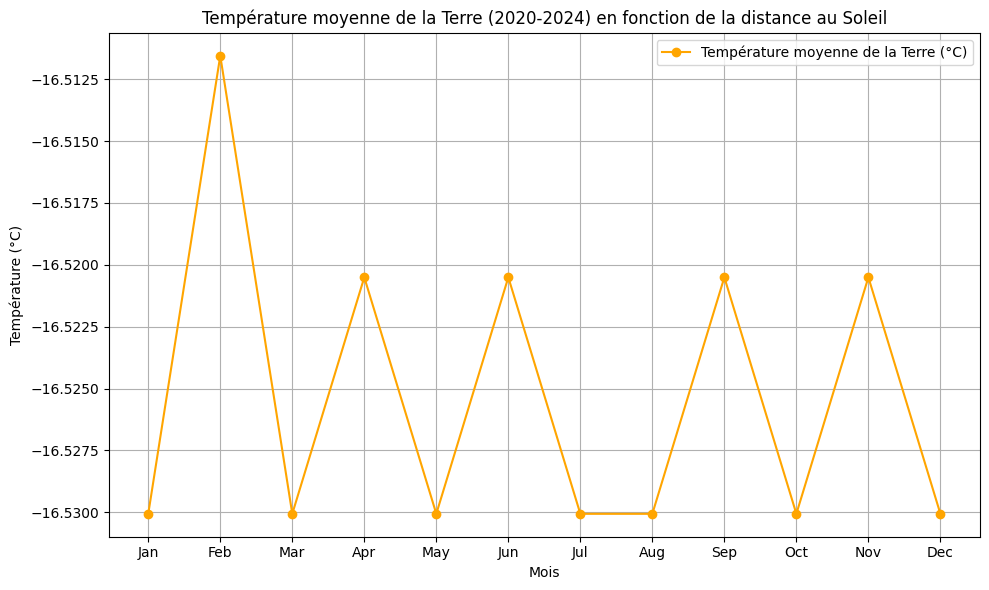

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constantes
albedo = 0.3  # Alb√©do moyen de la Terre
solar_constant = 1361  # Constante solaire en W/m¬≤
sigma = 5.67e-8  # Constante de Stefan-Boltzmann en W/m¬≤/K‚Å¥
eccentricity = 0.0167  # Excentricit√© de l'orbite terrestre

# Fonction pour calculer la distance de la Terre au Soleil en fonction du jour de l'ann√©e
def calculate_distance(day_of_year):
    # Angle de la Terre par rapport au Soleil, en radians (en utilisant la loi de Kepler approxim√©e)
    theta = 2 * np.pi * (day_of_year / 365.25)
    # Calcul de la distance en AU (Astronomical Unit)
    distance_au = 1 / (1 + eccentricity * np.cos(theta))
    return distance_au

# Fonction pour calculer la temp√©rature radiative de la Terre en fonction de la distance
def calculate_temperature(distance_au):
    # Calcul de la temp√©rature en Kelvin, puis conversion en Celsius
    temp_kelvin = ((1 - albedo) * solar_constant / (4 * sigma * (distance_au ** 2))) ** 0.25
    return temp_kelvin - 273.15  # Convertir en Celsius

# Fonction pour observer la temp√©rature sur plusieurs ann√©es
def observe_temperature(start_year, end_year):
    # Liste des mois de l'ann√©e
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]  # Nombre de jours par mois

    # Initialisation d'un tableau pour stocker les temp√©ratures moyennes
    monthly_temperatures = {month: [] for month in months}

    # It√©rer sur chaque ann√©e dans la plage sp√©cifi√©e
    for year in range(start_year, end_year + 1):
        for i, days in enumerate(days_in_month):
            avg_day_of_month = (sum(range(1, days + 1)) // days)  # Jour moyen du mois
            distance = calculate_distance(avg_day_of_month)  # Distance du Soleil
            temperature = calculate_temperature(distance)  # Temp√©rature associ√©e
            monthly_temperatures[months[i]].append(temperature)

    # Calcul de la temp√©rature moyenne pour chaque mois sur toute la p√©riode
    avg_monthly_temperatures = {month: np.mean(temps) for month, temps in monthly_temperatures.items()}

    # Retourner les r√©sultats sous forme de DataFrame pour une meilleure lisibilit√©
    return pd.DataFrame(avg_monthly_temperatures, index=[f'{start_year}-{end_year}'])

# Obtenir les temp√©ratures moyennes sur ... ans, de .. √† 2024
temperature_data = observe_temperature(1970, 2024)
print(temperature_data)

# Plot des temp√©ratures moyennes
plt.figure(figsize=(10, 6))
plt.plot(temperature_data.columns, temperature_data.iloc[0], marker='o', color='orange', label="Temp√©rature moyenne de la Terre (¬∞C)")
plt.xlabel("Mois")
plt.ylabel("Temp√©rature (¬∞C)")
plt.title("Temp√©rature moyenne de la Terre (1970-2024) en fonction de la distance au Soleil")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


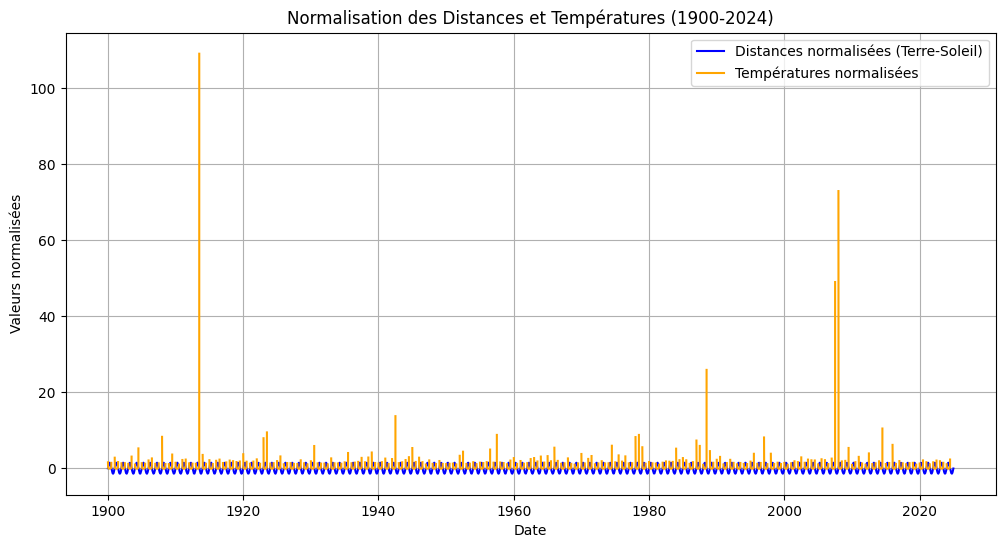

In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Calcul des temp√©ratures approximatives pour chaque jour en fonction de la distance
# Temp√©ratures approxim√©es en utilisant une relation simplifi√©e
temperatures = 255 / (df_distance["Distance_km"] / 149_597_870.7) ** 0.5  # Temp√©rature approximative en K

# Application du StandardScaler
scaler = StandardScaler()

# Transformation des donn√©es
distances_scaled = scaler.fit_transform(pd.DataFrame(df_distance["Distance_km"]))
temperatures_scaled = scaler.fit_transform(pd.DataFrame(temperatures))

# Affichage des donn√©es normalis√©es
plt.figure(figsize=(12, 6))

# Tracer les courbes normalis√©es
plt.plot(df_distance["Date"], distances_scaled, label="Distances normalis√©es (Terre-Soleil)", color="blue")
plt.plot(df_distance["Date"], temperatures_scaled, label="Temp√©ratures normalis√©es", color="orange")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Valeurs normalis√©es")
plt.title("Normalisation des Distances et Temp√©ratures (1900-2024)")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

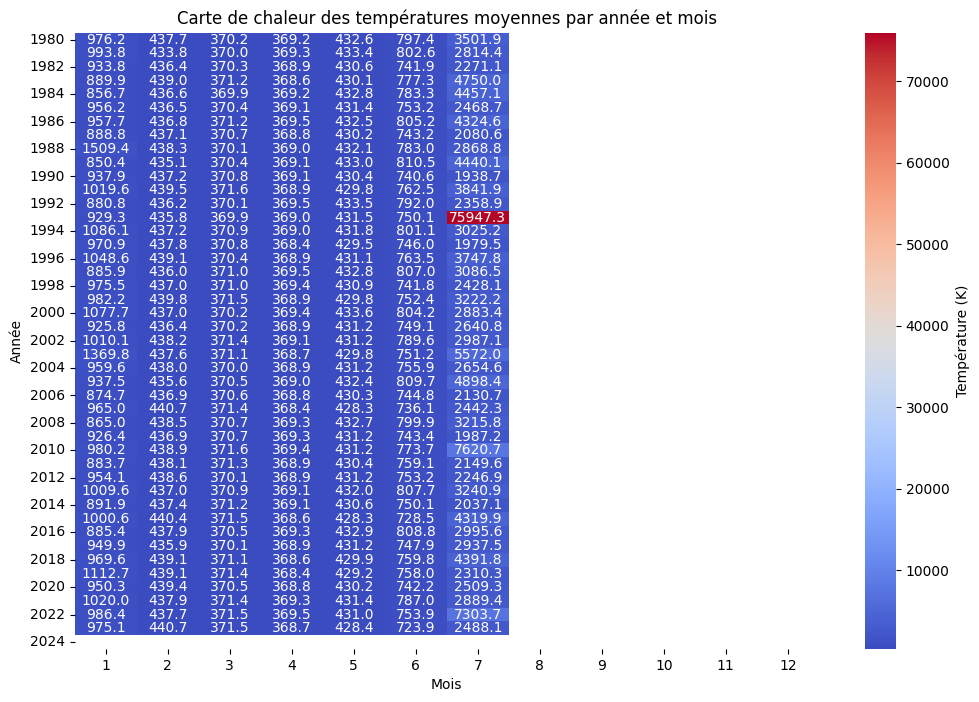

In [42]:
dff_distance = get_distance_data("1980-01-01", "2024-01-01")

# Ajouter les temp√©ratures au DataFrame
dff_distance["Temperature_K"] = temperatures

# Extraire l'ann√©e et le mois
dff_distance["Year"] = dff_distance["Date"].dt.year
dff_distance["Month"] = dff_distance["Date"].dt.month

# Calcul des temp√©ratures moyennes par ann√©e et mois
heatmap_data = dff_distance.groupby(["Year", "Month"])["Temperature_K"].mean().unstack()

# Cr√©ation de la carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Temp√©rature (K)'})
plt.title("Carte de chaleur des temp√©ratures moyennes par ann√©e et mois")
plt.xlabel("Mois")
plt.ylabel("Ann√©e")
plt.show()